# Quiz 1
## LT5 - Castillo, Cruz, Madarang, Valera

#**Time Series Forecasting with ARIMA: Predicting Weekly Spending Patterns**
##10 points, open resources allowed, 25 minutes individual work followed by a 20-minute group discussion to consolidate results

Juan has been tracking his weekly spending for over four years (October 1, 2020 – September 30, 2024). He is interested in forecasting his spending pattern for the next 16 weeks to manage his finances during the upcoming months better. He suspects his overall spending has increased over time due to inflation and lifestyle changes.

Juan decided to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast his spending for the next 16 weeks. Using the weekly spending data Juan has gathered, you are tasked with the following:

Create the best ARIMA model and evaluate its performance via RMSE and MAE by comparing the forecast with the actual data for the last 16 weeks, which will be used as a test set.

In [27]:
!uv add tqdm

Resolved 57 packages in 1.26s                                        
⠙ Preparing packages... (0/1)                                                   ⠋ Preparing packages... (0/0)                                                   
⠙ Preparing packages... (0/1)----     0 B/76.70 KiB                     
⠙ Preparing packages... (0/1)---- 14.89 KiB/76.70 KiB                   
⠙ Preparing packages... (0/1)---- 30.89 KiB/76.70 KiB                   
⠙ Preparing packages... (0/1)---- 46.89 KiB/76.70 KiB                   
⠙ Preparing packages... (0/1)---- 62.89 KiB/76.70 KiB                   
Prepared 1 package in 48ms                                                   
Installed 1 package in 8ms                                  
 + tqdm==4.67.1


In [5]:
!uv add openpyxl

Resolved 56 packages in 1.06s                                        
⠙ Preparing packages... (0/2)                                                   
⠙ Preparing packages... (0/2)----     0 B/17.64 KiB                     
⠙ Preparing packages... (0/2)2m-- 16.00 KiB/17.64 KiB                   
et-xmlfile ------------------------------ 16.00 KiB/17.64 KiB
⠙ Preparing packages... (0/2)----     0 B/245.03 KiB                    
et-xmlfile ------------------------------ 16.00 KiB/17.64 KiB
⠙ Preparing packages... (0/2)---- 14.88 KiB/245.03 KiB                  
et-xmlfile ------------------------------ 17.64 KiB/17.64 KiB
⠙ Preparing packages... (0/2)---- 14.88 KiB/245.03 KiB                  
⠙ Preparing packages... (0/2)---- 14.88 KiB/245.03 KiB                  
⠙ Preparing packages... (0/2)---- 30.88 KiB/245.03 KiB                  
⠙ Preparing packages... (0/2)---- 46.88 KiB/245.03 KiB                  
⠙ Preparing packages... (0/2)---- 62.88 KiB/245.03 KiB                  
⠙ Prep

In [15]:
import pandas as pd

# from google.colab import drive
# drive.mount('/content/drive')
# data_dir = "../../data/"

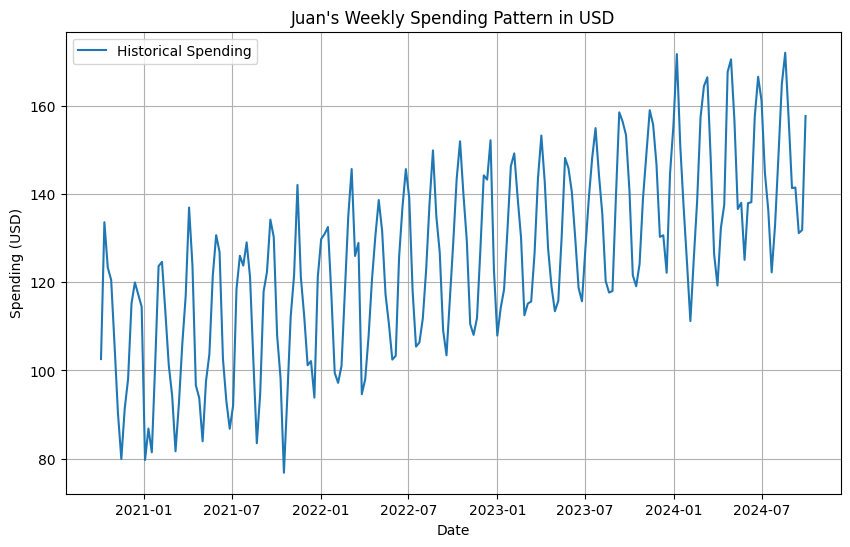

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
data = pd.read_excel('/Users/katecastillo/Documents/MSDS/machine-learning2/data/juan_spending_pattern.xlsx', parse_dates=['Date'], index_col='Date')

# Visualize the data to see trend and seasonality using open circle symbols
plt.figure(figsize=(10, 6))
plt.plot(data['Spending'],  linestyle='-', label='Historical Spending')  # 'o' for open circle
plt.title('Juan\'s Weekly Spending Pattern in USD')
plt.xlabel('Date')
plt.ylabel('Spending (USD)')
plt.grid(True)
plt.legend()
plt.show()


# **Task: Select the Best ARIMA (p, d, q) Model**

### Identify the best ARIMA model using the p, d, q parameters based on the evaluation metrics.

**Primary Metric:** Mean Absolute Error (MAE)

**Secondary Metric:** Root Mean Square Error (RMSE)

**Instructions:**
*   Supply the best p, d, q values based on the results.
*   Use the provided code below to run the model with your selected parameters.




## **Evaluation Criteria for ARIMA Model Selection**

- **Primary Evaluation Metric**: **Mean Absolute Error (MAE)**
  
  - **Top LT Performer**:
    - A submission with the **lowest MAE** will receive **10/10 points**, provided the MAE is below **$3.50 USD**.
    - If the MAE exceeds **$3.50 USD**, the maximum score will be **9.5/10**.
  
  - **Second Lowest MAE**:
    - The submission with the second lowest MAE will receive **9.5/10 points**.
  
  - **Other Submissions**:
    - Any other submissions with an MAE below **$3.5 USD** will receive **9/10 points**.

- **Minimum Threshold**:

  - Submissions with an MAE exceeding **5.0 USD** but below **6.0 USD** will receive **6/10 points**.
  - Submissions with an MAE exceeding **$6.0 USD** will receive **2/10 points**.

In [18]:
import os
os.chdir("/Users/katecastillo/Documents/MSDS/machine-learning2/machine-learning2")

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter("ignore", ValueWarning)

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product

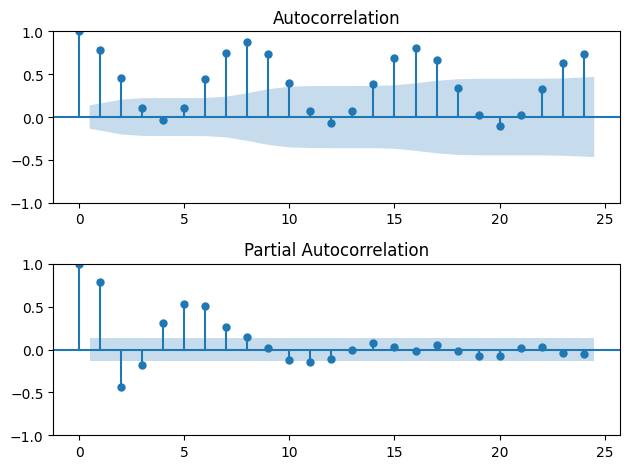

In [55]:
# Create a figure for subplots
plt.figure()

# Plot ACF (Autocorrelation Function) in the first subplot
plt.subplot(211)
plot_acf(data["Spending"], ax=plt.gca())

# Plot PACF (Partial Autocorrelation Function) in the second subplot
plt.subplot(212)
plot_pacf(data["Spending"], ax=plt.gca())

# Show the plots
plt.tight_layout()  # Ensure no overlapping between plots
plt.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from tqdm import tqdm
import time  # To calculate runtime for each LT

# Suppress warnings
warnings.filterwarnings("ignore")

# Split data into training (first n-16 weeks) and test (last 16 weeks)
train = data['Spending'][:-16]
test = data['Spending'][-16:]

# Define the different learning terms (LTs) with their respective (p, d, q) values
LT_submissions = {
    # 'LT1': (3, 1, 1),
    # 'LT2': (0, 1, 1),
    # 'LT3': (0, 1, 1),
    # 'LT4': (0, 1, 1),
    'LT5': (0, 1, 1),
    # 'LT6': (0, 1, 0),

    # Add more LTs and (p, d, q) values as needed
}

# List to store results
results = []

p_range = range(5, 15)
d_range = range(0, 3)
q_range = range(5, 17)

results = {}

# Progress bar for LT evaluation
for lt, (p, d, q) in tqdm(LT_submissions.items(), desc="Evaluating Learning Terms"):
    start_time = time.time()  # Start the timer

    for p, d, q in product(p_range, d_range, q_range):
        order = (p, d, q)
        # Fit ARIMA model
        model = ARIMA(train, order=order)
        fitted_model = model.fit()

        # Forecast the next 16 weeks
        forecast = fitted_model.forecast(steps=16)

        # Evaluate model performance
        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))

        results[order] = mae

        print(f"Order {order}, MAE: {mae}")

    # Calculate runtime for the current LT
    run_time = time.time() - start_time

#     # Store the results for each LT
#     results.append({'LT': lt, 'p': p, 'd': d, 'q': q, 'MAE': mae, 'RMSE': rmse, 'Runtime (s)': run_time})

# # Convert results to a DataFrame for sorting and ranking
# results_df = pd.DataFrame(results)

# # Sort results by MAE (ascending order)
# results_df = results_df.sort_values(by='MAE', ascending=True)

# # Display the ranking from lowest MAE to highest
# print("\nRanking of Learning Terms by MAE:")
# print(results_df[['LT', 'p', 'd', 'q', 'MAE', 'RMSE', 'Runtime (s)']])

# # Plot the forecast vs actual for the best LT
# best_lt = results_df.iloc[0]  # Best LT based on lowest MAE
# print(f"\nBest LT is {best_lt['LT']} with ARIMA({best_lt['p']},{best_lt['d']},{best_lt['q']})")

# # Fit ARIMA model for the best LT
# best_model = ARIMA(train, order=(best_lt['p'], best_lt['d'], best_lt['q']))
# best_fitted_model = best_model.fit()

# # Forecast and plot for the best LT
# best_forecast = best_fitted_model.forecast(steps=16)

# # Plot forecast vs actual for the best LT
# plt.figure(figsize=(10,6))
# plt.plot(data.index, data['Spending'], label='Historical Spending')
# plt.plot(test.index, best_forecast, label=f'Forecasted Spending ({best_lt["LT"]})', color='red')
# plt.legend()
# plt.title(f'Forecast vs Actual Spending for Best LT: {best_lt["LT"]}')
# plt.show()

Evaluating Learning Terms:   0%|          | 0/1 [00:00<?, ?it/s]

Order (5, 0, 5), MAE: 14.918707615688627
Order (5, 0, 6), MAE: 4.208662957838393
Order (5, 0, 7), MAE: 4.127880351805397
Order (5, 0, 8), MAE: 4.07013662450181
Order (5, 0, 9), MAE: 13.486884395492016
Order (5, 0, 10), MAE: 15.201464182732535
Order (5, 0, 11), MAE: 4.551807529182414
Order (5, 0, 12), MAE: 4.235332792064998
Order (5, 0, 13), MAE: 22.016741494224497
Order (5, 0, 14), MAE: 3.205714347503048
Order (5, 0, 15), MAE: 3.6663025377436664
Order (5, 0, 16), MAE: 20.61511062116886
Order (5, 1, 5), MAE: 4.086354657321832
Order (5, 1, 6), MAE: 4.177159858353635
Order (5, 1, 7), MAE: 4.13903081227423
Order (5, 1, 8), MAE: 4.146899146299465
Order (5, 1, 9), MAE: 4.083152894352021
Order (5, 1, 10), MAE: 3.932600563455977
Order (5, 1, 11), MAE: 3.9742250887091224
Order (5, 1, 12), MAE: 4.796576405031185
Order (5, 1, 13), MAE: 3.745282926234073
Order (5, 1, 14), MAE: 4.024769683592741
Order (5, 1, 15), MAE: 3.8356264115090424
Order (5, 1, 16), MAE: 4.101657382475486
Order (5, 2, 5), MAE:

Evaluating Learning Terms: 100%|██████████| 1/1 [06:40<00:00, 400.43s/it]

Order (14, 2, 16), MAE: 4.097279513973998


In [64]:
best_order = min(results, key=results.get)
best_mae = results[best_order]

print(f"\nBest Order: {best_order}, Lowest MAE: {best_mae}")


Best Order: (10, 1, 10), Lowest MAE: 3.1059944008813805


Evaluating Learning Terms: 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]



Ranking of Learning Terms by MAE:
    LT   p  d   q        MAE       RMSE  Runtime (s)
4  LT5  10  1  10   3.105994   3.952856     1.015842
0  LT1   3  1   1   8.324550  10.078795     0.097529
5  LT6   0  1   0  14.399652  17.479921     0.020431
1  LT2   0  1   1  14.938823  18.329755     0.028035
2  LT3   0  1   1  14.938823  18.329755     0.029947
3  LT4   0  1   1  14.938823  18.329755     0.028079

Best LT is LT5 with ARIMA(10,1,10)


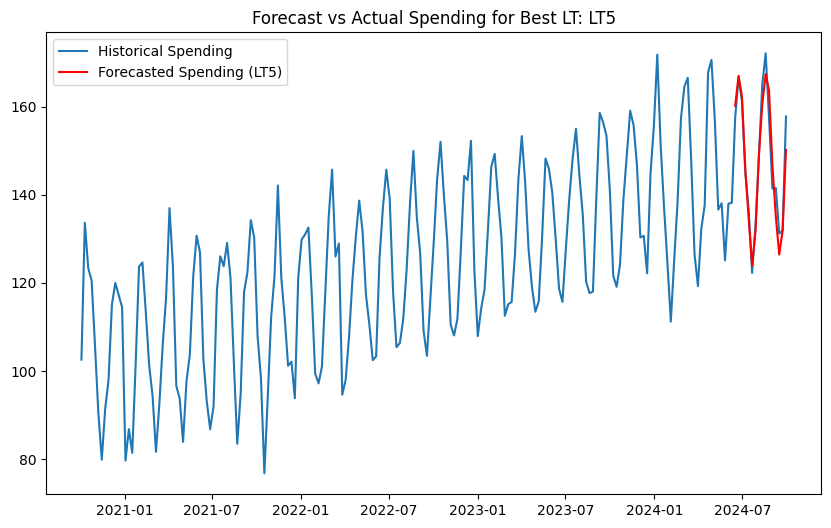

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from tqdm import tqdm
import time  # To calculate runtime for each LT

# Suppress warnings
warnings.filterwarnings("ignore")

# Split data into training (first n-16 weeks) and test (last 16 weeks)
train = data['Spending'][:-16]
test = data['Spending'][-16:]

# Define the different learning terms (LTs) with their respective (p, d, q) values
LT_submissions = {
    'LT1': (3, 1, 1),
    'LT2': (0, 1, 1),
    'LT3': (0, 1, 1),
    'LT4': (0, 1, 1),
    'LT5': (10, 1, 10),
    'LT6': (0, 1, 0),

    # Add more LTs and (p, d, q) values as needed
}

# List to store results
results = []

# Progress bar for LT evaluation
for lt, (p, d, q) in tqdm(LT_submissions.items(), desc="Evaluating Learning Terms"):
    start_time = time.time()  # Start the timer

    # Fit ARIMA model
    model = ARIMA(train, order=(p, d, q))
    fitted_model = model.fit()

    # Forecast the next 16 weeks
    forecast = fitted_model.forecast(steps=16)

    # Evaluate model performance
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))

    # Calculate runtime for the current LT
    run_time = time.time() - start_time

    # Store the results for each LT
    results.append({'LT': lt, 'p': p, 'd': d, 'q': q, 'MAE': mae, 'RMSE': rmse, 'Runtime (s)': run_time})

# Convert results to a DataFrame for sorting and ranking
results_df = pd.DataFrame(results)

# Sort results by MAE (ascending order)
results_df = results_df.sort_values(by='MAE', ascending=True)

# Display the ranking from lowest MAE to highest
print("\nRanking of Learning Terms by MAE:")
print(results_df[['LT', 'p', 'd', 'q', 'MAE', 'RMSE', 'Runtime (s)']])

# Plot the forecast vs actual for the best LT
best_lt = results_df.iloc[0]  # Best LT based on lowest MAE
print(f"\nBest LT is {best_lt['LT']} with ARIMA({best_lt['p']},{best_lt['d']},{best_lt['q']})")

# Fit ARIMA model for the best LT
best_model = ARIMA(train, order=(best_lt['p'], best_lt['d'], best_lt['q']))
best_fitted_model = best_model.fit()

# Forecast and plot for the best LT
best_forecast = best_fitted_model.forecast(steps=16)

# Plot forecast vs actual for the best LT
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Spending'], label='Historical Spending')
plt.plot(test.index, best_forecast, label=f'Forecasted Spending ({best_lt["LT"]})', color='red')
plt.legend()
plt.title(f'Forecast vs Actual Spending for Best LT: {best_lt["LT"]}')
plt.show()